<a href="https://colab.research.google.com/github/chakravartulavinay/Wine_Quality/blob/main/Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
from sklearn.model_selection import train_test_split

In [2]:
URL = "/content/drive/MyDrive/winequality.red.csv"
data = pd.read_csv(URL)
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,red,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,red,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,red,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
1596,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
data['quality'] = data['quality'].apply(lambda x: 1 if x > 5 else 0)
data.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,red,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,red,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,red,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,red,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,red,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [4]:
data['quality'].sum()

855

In [5]:
data.shape

(1599, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  1599 non-null   object 
 1   fixed acidity         1597 non-null   float64
 2   volatile acidity      1598 non-null   float64
 3   citric acid           1598 non-null   float64
 4   residual sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free sulfur dioxide   1599 non-null   float64
 7   total sulfur dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   pH                    1597 non-null   float64
 10  sulphates             1597 non-null   float64
 11  alcohol               1599 non-null   float64
 12  quality               1599 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [7]:
data.isna().sum()

type                    0
fixed acidity           2
volatile acidity        1
citric acid             1
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      2
sulphates               2
alcohol                 0
quality                 0
dtype: int64

In [8]:
data['fixed acidity'] = data['fixed acidity'].fillna(data['fixed acidity'].mean())
data['volatile acidity'] = data['volatile acidity'].fillna(data['volatile acidity'].median())
data['citric acid'] = data['citric acid'].fillna(data['citric acid'].median())
data['pH'] = data['pH'].fillna(data['pH'].median())
data['sulphates'] = data['sulphates'].fillna(data['sulphates'].mean())

In [9]:
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.560000,9.4,0
1,red,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.680000,9.8,0
2,red,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.650000,9.8,0
3,red,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.580000,9.8,1
4,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.560000,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,0
1595,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.658078,11.2,1
1596,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,1
1597,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,0


In [10]:
data.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: xlabel='quality', ylabel='count'>

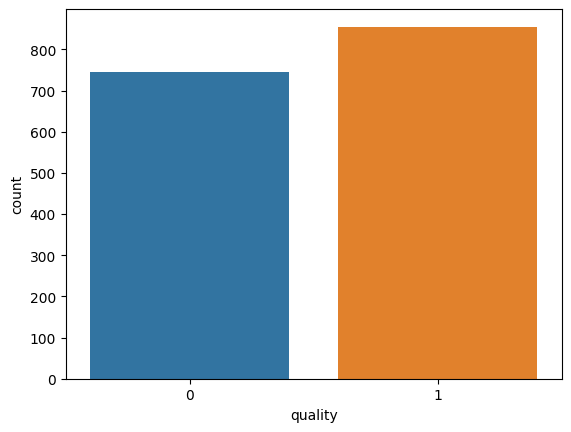

In [11]:
sns.countplot(x="quality",data = data)

In [12]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.322104,0.527733,0.271138,2.538806,0.087467,15.874922,46.467792,0.996747,3.310863,0.658078,10.422983,0.534709
std,1.739677,0.179029,0.194683,1.409928,0.047065,10.460157,32.895324,0.001887,0.154193,0.169488,1.065668,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [13]:
data.corr()

<ipython-input-13-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255581,0.670745,0.114870,0.093350,-0.154546,-0.114259,0.667650,-0.682458,0.183874,-0.061376,0.094892
volatile acidity,-0.255581,1.000000,-0.553015,0.001932,0.061511,-0.011354,0.075657,0.022706,0.234456,-0.261460,-0.203414,-0.321952
citric acid,0.670745,-0.553015,1.000000,0.143404,0.203796,-0.059167,0.035771,0.364660,-0.541035,0.314264,0.110736,0.160005
residual sugar,0.114870,0.001932,0.143404,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085871,0.005576,0.042075,-0.002160
chlorides,0.093350,0.061511,0.203796,0.055610,1.000000,0.005562,0.047400,0.200632,-0.264965,0.371473,-0.221141,-0.109494
free sulfur dioxide,-0.154546,-0.011354,-0.059167,0.187049,0.005562,1.000000,0.667666,-0.021946,0.071083,0.050839,-0.069408,-0.061757
total sulfur dioxide,-0.114259,0.075657,0.035771,0.203028,0.047400,0.667666,1.000000,0.071269,-0.065531,0.042921,-0.205654,-0.231963
density,0.667650,0.022706,0.364660,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341310,0.148847,-0.496180,-0.159110
pH,-0.682458,0.234456,-0.541035,-0.085871,-0.264965,0.071083,-0.065531,-0.341310,1.000000,-0.197578,0.205769,-0.002423
sulphates,0.183874,-0.261460,0.314264,0.005576,0.371473,0.050839,0.042921,0.148847,-0.197578,1.000000,0.093307,0.217793


<ipython-input-14-4e104bdbc987>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cmap='hot',annot=True)


<Axes: title={'center': 'Heapmap'}>

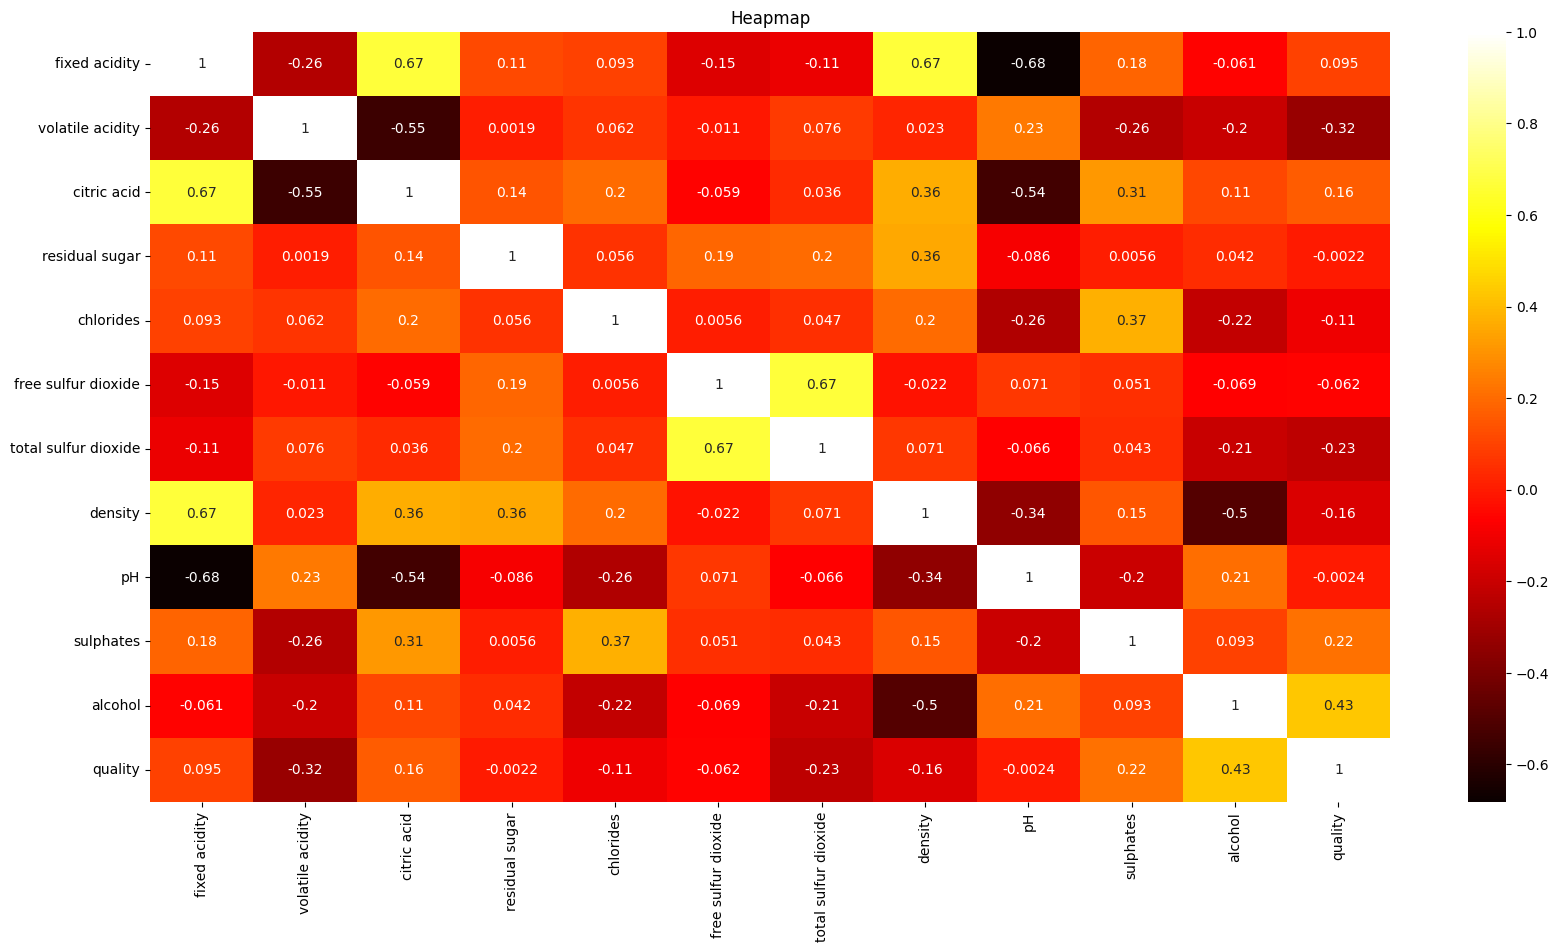

In [14]:
plt.figure(figsize = (20,10))
plt.title('Heapmap')
sns.heatmap(data.corr(),cmap='hot',annot=True)

In [15]:
data = data.drop(columns = ['type'])

In [16]:
x = data.drop("quality",axis = 1)
y = data['quality']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1119, 11)
(480, 11)
(1119,)
(480,)


In [19]:
from sklearn.linear_model import  LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
predictions = logmodel.predict(x_test)

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
confusion_matrix(y_test,predictions)

array([[166,  65],
       [ 58, 191]])

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
format(accuracy_score(y_test,predictions),".2f")

'0.74'